In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#datagen = ImageDataGenerator(
 #       rotation_range=40,
 #       width_shift_range=.2,
 #       height_shift_range=.2,
  #      rescale=1./255,
   #     shear_range=.2,
    #    zoom_range=.2,
     #  horizontal_flip=True,
      #  fill_mode='nearest')

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense

#pass 1
model = Sequential()
model.add(Conv2D(32, (3,3),input_shape = (150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#pass 2
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#pass 3
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#the model so far  outputs 3D feature maps(height, width, features)

In [3]:
model.add(Flatten()) #this convert our #2D feature maps to 1D feature vector
model.add(Dense(64)) #fully connect ANN Network
model.add(Activation('relu'))
model.add(Dropout(0.4)) # Generalizing ( avoiding overfitting)
model.add(Dense(1))
model.add(Activation('sigmoid'))#softmax for multiclass,linnear for regress

model.compile(loss = 'binary_crossentropy',
             optimizer='rmsprop',
             metrics = ['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [5]:
batch_size = 16
#this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=.2,
        zoom_range=.2,
        horizontal_flip=True)
# this is the augmentatin coniguration we will use for testing:
#only rescaling

test_datagen = ImageDataGenerator(rescale=1.255)
#this is a generator that will read pictures found in
#subfolders of ' data/trin', indefinitely generate
#batches of augmented image data
train_generator = train_datagen.flow_from_directory(r'C:\Users\hp\Documents\Custom Office Templates\AV\archive (4)\training_set\training_set',
#this is the target directory
target_size = (150,150), #all images will bw resized to 150x150
batch_size = batch_size,
                                                    class_mode= 'binary')

# this is similar generator, for a validation data
validation_generator = test_datagen.flow_from_directory(r'C:\Users\hp\Documents\Custom Office Templates\AV\archive (4)',
                                                       target_size = (150,150), #all images will bw resized to 150x150
batch_size = batch_size,
                                                    class_mode= 'binary')

Found 8005 images belonging to 2 classes.
Found 10028 images belonging to 2 classes.


In [6]:
#train the model

In [7]:
model.fit_generator(
        train_generator,
        steps_per_epoch = 1602//batch_size,
        epochs = 5,
        validation_data=validation_generator,
        validation_steps=400//batch_size)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 113s 1s/step - loss: 0.6999 - accuracy: 0.5251 - val_loss: 10.7655 - val_accuracy: 0.7600
Epoch 2/5
100/100 [==============================] - 88s 882ms/step - loss: 0.6903 - accuracy: 0.5397 - val_loss: 36.9880 - val_accuracy: 0.7525
Epoch 3/5
100/100 [==============================] - 78s 776ms/step - loss: 0.6709 - accuracy: 0.6133 - val_loss: 55.9728 - val_accuracy: 0.6600
Epoch 4/5
100/100 [==============================] - 69s 692ms/step - loss: 0.6495 - accuracy: 0.6257 - val_loss: 95.9209 - val_accuracy: 0.6700
Epoch 5/5
100/100 [==============================] - 65s 645ms/step - loss: 0.6317 - accuracy: 0.6360 - val_loss: 84.4561 - val_accuracy: 0.7025


In [8]:
model.save_weights('my_model_at_10_.h5') #always save your weight after training or during training

In [9]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img = load_img(r"C:\Users\hp\Downloads\cat3.jpg")
x = img_to_array(img.resize([150,150])) #this is a numpy array with shape(150,150,3)
x = x.reshape((1,)+x.shape) #this is numpy array with shape (1,150,150,3)

In [10]:
x.shape

(1, 150, 150, 3)

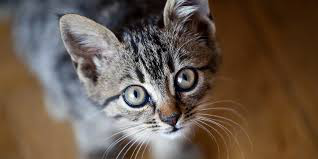

In [11]:
img

In [12]:
if (model.predict_classes(x)==0):
    print('It is a CAT')
else:
    print("It is a Dog")

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


It is a CAT
